Seaborn Installation(Must run this command if seaborn is not installed.)

In [1]:
#conda install seaborn


TextBlob installation (Must run this command if textblob is not installed.) 

In [2]:
#conda install textblob

We are importing numpy for numerical analysis.
We are importing seaborn for data visualization.
We are importing matplotlib.pyplot as its mandatory to import with seaborn as seaborn is built on top of it.
we are importing pandas so that we can work with DataFrames.

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
%matplotlib inline

We are reading Tweets - Tweets.csv file with pandas and storing it in tweets.

In [4]:
tweets = pd.read_csv('Tweets - Tweets.csv')
tweets.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Counting the total number of objects in tweets dataframe.

In [5]:
tweets.count()

tweet_id          14640
airline           14640
name              14640
retweet_count     14640
text              14640
tweet_coord        1019
tweet_created     14640
tweet_location     9907
user_timezone      9820
dtype: int64

Heatmap to show the null values present in few columns of tweets dataframe as shown below.(white strips represents null values.)

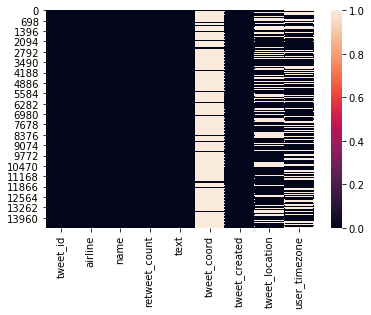

In [6]:
sns.heatmap(tweets.isnull())

Adding another column by name-length and giving it the lengths of the tweet texts and printing its head of 5 rows out.

In [7]:
tweets['length'] = tweets['text'].apply(len)
tweets.head()


,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55


Histogram Plot of the Coloumn-length in tweets dataframe.

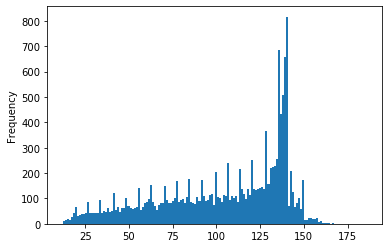

In [8]:
tweets['length'].plot.hist(bins=150)

Line 9-13 gives the minimum, maximum, average, standard deviation and variance of the column-retweet_count.

In [9]:
tweets['retweet_count'].min()

0

In [10]:
tweets['retweet_count'].max()

44

In [11]:
tweets['retweet_count'].mean()

0.08265027322404371

In [12]:
tweets['retweet_count'].std()

0.7457781608465317

In [13]:
tweets['retweet_count'].var()

0.5561850651956354

Gives the unique objects present in airline column.

In [14]:
tweets['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Gives the total number of unique names.

In [15]:
len(tweets['name'].unique())

7701

Tweets are grouped by the column-airline and its displayed as below.

In [16]:
by_airline = tweets.groupby('airline').count()
by_airline

,tweet_id,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length
airline,,,,,,,,,
American,2759,2759,2759,2759,183,2759,1848,1791,2759
Delta,2222,2222,2222,2222,160,2222,1604,1613,2222
Southwest,2420,2420,2420,2420,160,2420,1596,1659,2420
US Airways,2913,2913,2913,2913,150,2913,1844,1851,2913
United,3822,3822,3822,3822,319,3822,2633,2527,3822
Virgin America,504,504,504,504,47,504,382,379,504


Bar Plot of the airlines vs number of tweets.(i.e, how many tweets were made for the particular airline concerned.)

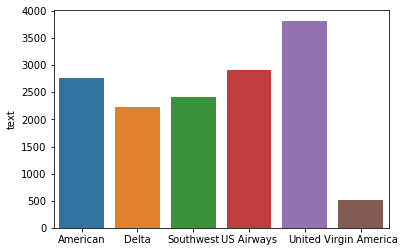

In [17]:
sns.barplot(x=['American','Delta','Southwest','US Airways','United','Virgin America'],y='text',data=by_airline)

***************SENTIMENT ANALYSIS**************

Defining the functions for sentimantal polarity and subjectivity storing them in the new columns of tweets dataframe and printing them out as shown below.(line 18-21)

In [18]:
def sentiment_pol(series_data):
    sent_pol = []
    for i in range(0,14640):
        text1 = series_data[i]
        text_process = TextBlob(text1)
        pol = text_process.sentiment.polarity
        sent_pol.append(pol)
    return sent_pol

In [19]:
def sentiment_sub(series_data):
    sent_sub = []
    for i in range(0,14640):
        text1 = series_data[i]
        text_process = TextBlob(text1)
        sub = text_process.sentiment.polarity
        sent_sub.append(sub)
    return sent_sub


In [20]:
tweets['Sentimental Polarity of tweets'] = sentiment_pol(tweets['text'])
tweets['Sentimental Subjectivity of tweets'] = sentiment_sub(tweets['text'])

In [21]:
tweets.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length,Sentimental Polarity of tweets,Sentimental Subjectivity of tweets
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35,0.000000,0.000000
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72,0.000000,0.000000
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71,-0.390625,-0.390625
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126,0.006250,0.006250
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55,-0.350000,-0.350000


Getting the output of tweets dataframe as a csv file with columns sentimental polarity and subjectivity added.

In [22]:
#tweets.to_csv('tweets.csv')

VISUALIZATION OF TWEETS SENTIMENTS

Getting the unique names of airlines and plotting the swarm plots of  airline vs Sentimental polarity and subjectivity.

In [23]:
tweets['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

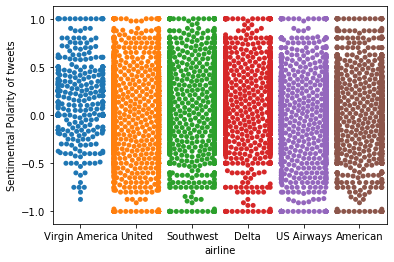

In [24]:
sns.swarmplot(x='airline',y='Sentimental Polarity of tweets',data=tweets)

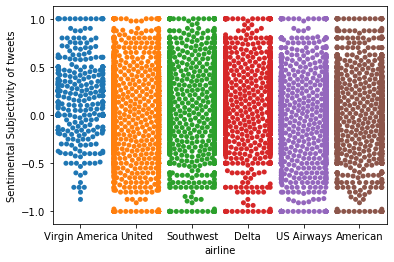

In [25]:
sns.swarmplot(x='airline',y='Sentimental Subjectivity of tweets',data=tweets)

BoxPlot of airline vs Sentimental polarity and subjectivity.

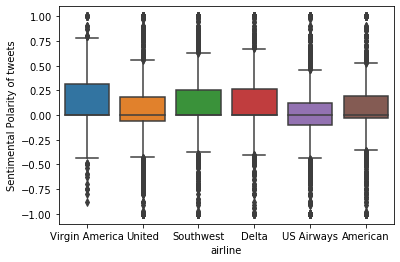

In [26]:
sns.boxplot(x='airline',y='Sentimental Polarity of tweets',data=tweets)

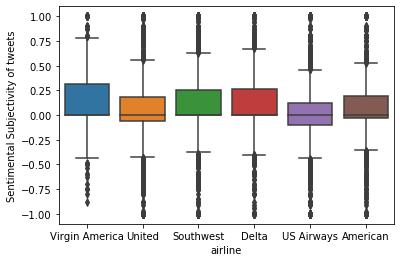

In [27]:
sns.boxplot(x='airline',y='Sentimental Subjectivity of tweets',data=tweets)

Box plot of polarity and subjectivity in the scale of 0-2. (This shows that all the airlines has Positive responses on an average.)

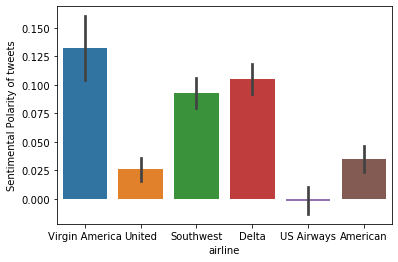

In [28]:
sns.barplot(x='airline',y='Sentimental Polarity of tweets',data=tweets)

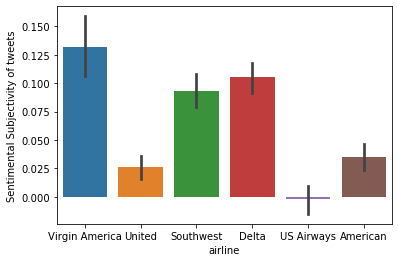

In [29]:
sns.barplot(x='airline',y='Sentimental Subjectivity of tweets',data=tweets)

Caculating the total percentages of polarity and subjectivity and potting them on a pie chart.

In [30]:
def percentage(num,whole):
    return (100*num/(whole))

In [31]:
elements1 = []
elements2 = []
elements3 = []
elements4 = []
elements5 = []
elements6 = []
for i in range(0,14640):
    if tweets['airline'][i]=='Virgin America':
        elements1.append(tweets['Sentimental Polarity of tweets'][i])
    elif tweets['airline'][i]=='United':
        elements2.append(tweets['Sentimental Polarity of tweets'][i])
    elif tweets['airline'][i]=='Southwest':
        elements3.append(tweets['Sentimental Polarity of tweets'][i])
    elif tweets['airline'][i]=='Delta':
        elements4.append(tweets['Sentimental Polarity of tweets'][i])
    elif tweets['airline'][i]=='US Airways':
        elements5.append(tweets['Sentimental Polarity of tweets'][i])
    else:
        elements6.append(tweets['Sentimental Polarity of tweets'][i])
        
np1=np.sum(elements1)
np2=np.sum(elements2)
np3=np.sum(elements3)
np4=np.sum(elements4)
np5=np.sum(elements5)
np6=np.sum(elements6)
wp = np.sum(tweets['Sentimental Polarity of tweets'])

In [32]:
element1 = []
element2 = []
element3 = []
element4 = []
element5 = []
element6 = []
for i in range(0,14640):
    if tweets['airline'][i]=='Virgin America':
        element1.append(tweets['Sentimental Subjectivity of tweets'][i])
    elif tweets['airline'][i]=='United':
        element2.append(tweets['Sentimental Subjectivity of tweets'][i])
    elif tweets['airline'][i]=='Southwest':
        element3.append(tweets['Sentimental Subjectivity of tweets'][i])
    elif tweets['airline'][i]=='Delta':
        element4.append(tweets['Sentimental Subjectivity of tweets'][i])
    elif tweets['airline'][i]=='US Airways':
        element5.append(tweets['Sentimental Subjectivity of tweets'][i])
    else:
        element6.append(tweets['Sentimental Subjectivity of tweets'][i])
        
ns1=np.sum(element1)
ns2=np.sum(element2)
ns3=np.sum(element3)
ns4=np.sum(element4)
ns5=np.sum(element5)
ns6=np.sum(element6)
ws = np.sum(tweets['Sentimental Subjectivity of tweets'])

In [33]:
sentiment = pd.DataFrame({'Polarity Percentage':[percentage(np1,wp),percentage(np2,wp),percentage(np3,wp),
                                                   percentage(np4,wp),percentage(np5,wp),percentage(np6,wp)],
                            'Subjectivity Percentage':[percentage(ns1,ws),percentage(ns2,ws),percentage(ns3,ws),
                                                       percentage(ns4,ws),percentage(ns5,ws),percentage(ns6,ws)]},
                        index=[tweets['airline'].unique()])
sentiment

,Polarity Percentage,Subjectivity Percentage
Virgin America,9.286483,9.286483
United,14.076740,14.076740
Southwest,31.318872,31.318872
Delta,32.541269,32.541269
US Airways,-0.740270,-0.740270
American,13.516907,13.516907


From the above table we can clealy see that US Airways was rated negatively. and the best positive rating goes to Delta airlines.